In [84]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

In [159]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # 불용어처리

#  빈도수 높은 키워드 처리
stop_words.extend(['from', 'subject', 're', 'edu', 'use',' court', 'home',' council', 'hunter', 'help', 'time', 'injure', 'national', 'build', 'end', 'bid', 'cup', 'un', 'come', 'security', 'volunteer', 'ship', 'crew', 'crowd', 'join', 'helicopter', 'across', 'museum', 'Italy', 'grind', 'asian', 'sa', 'miss', 'one', 'die', 'use', 'three', 'Darwin', 'vic', 'number', 'may', 'start', 'law', 'way', 'communities', 'order', 'check', 'major', 'india', 'focus', 'form', 'journalist', 'milk', 'nz', 'rank', 'cook', 'egypt', 'New', 'year', 'force', 'fail', 'dead', 'was', 'farmer', 'fruit', 'philippines', 'injury', 'nick'])
stop_words.extend(['fire', 'new', 'hobart', 'rural', 'world', 'boat', 'turn', 'flight', 'around', 'well', 'Find', 'two', 'adelaide', 'murder', 'first', 'make', 'body', 'probe', 'outback', 'tourism', 'baby', 'David', 'street', 'mass', 'hotel', 'Police', 'say', 'open', 'dog', 'go', 'welcome', 'president', 'announce', 'level', 'allow', 'highest','queensland', 'kill', 'crash', 'road', 'record', 'nt', 'hit', 'plane', 'toll', 'suspend', 'peninsula', 'afghan', 'recovery','man', 'perth', 'flood', 'people', 'prison', 'still', 'supply', 'siege', 'spark', 'summer', 'Michael', 'ops', 'large', 'flash', 'view', 'attack', 'back', 'mine', 'deal', 'fan', 'celebrate', 'target', 'hill', 'party', 'reveal', 'terrorism', 'video', 'pressure', 'remember', 'korea', 'indian', 'millions', 'drill', 'country', 'hour', 'podcast', 'leaders', 'thursday', 'abbott', 'tony', 'policy', 'agricultural', 'shorten', 'sach', 'day', 'years', 'show', 'teen', 'heat', 'sport', 'issue', 'free', 'australias', 'asbestos', 'compete','South', 'china', 'talk', 'appeal', 'labor', 'plant', 'peter', 'allegedly', 'begin', 'try', 'ice', 'native', 'alcohol', 'Australia', 'league', 'live', 'launch', 'campaign', 'benefit', 'update', 'stream', 'cabinet', 'document', 'bob','Test', 'drug', 'brisbane', 'international', 'british', 'double', 'treat', 'patient', 'ebola', 'Wa', 'bushfire', 'research', 'expansion', 'ready', 'old', 'release', 'paper', 'see'])

# 그 아래에서  빈도수 높은 키워드 처리
stop_words.extend(['call',  'queensland', 'melbourne', 'perth', 'thousands', 'alert', 'reveal', 'spark', 'amid', 'illegal', 'australian', 'price',  'brisbane', 'western', 'high', 'fan', 'prepare', 'british', 'battle', 'beach', 'wa', 'take',  'box', 'could',  'search', 'black', 'michael', 'week','man', 'day' ,'country', 'new', 'old', 'police', 'test',  'force', 'release', 'hobart', 'council', 'die', 'miss','say', 'south', 'was','fire', 'victoria', 'build','australia', 'court','find', 'fall','mine','attack', 'darwin', 'break', 'record', 'david', 'reflect', 'remember','adelaide', 'show'])

#stop_words



In [86]:
import pandas as pd
data = pd.read_csv('/Users/moon-il/Downloads/abcnews-date-text.csv', error_bad_lines=False);

In [87]:
data['publish_date'] = pd.to_datetime(data['publish_date'].astype(str), format = '%Y%m%d')

In [88]:
data['publish_date'] = pd.DatetimeIndex(data['publish_date']).year

In [158]:
data2 = data['headline_text']

#data2

In [90]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data['headline_text']))

In [91]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [92]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


In [156]:

#data_words_nostops

In [94]:

data_words_nostops = pd.Series(data_words_nostops)
data_lemmatized = data_words_nostops.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [95]:
temp = data
temp['lemmatize'] = data_lemmatized
for i in range(15):
    globals()['trend{}'.format(i+2003)] = temp.loc[temp.publish_date == i+2003]

In [96]:
trend_list = [trend2003, trend2004, trend2005, trend2006, trend2007, trend2008, trend2009, trend2010, trend2011, trend2012, trend2013, trend2014, trend2015, trend2016, trend2017]

In [157]:
#trend2003  # 2003년의 트렌드를 보기 위해

In [106]:
lemmatized = list(trend2015['lemmatize'])  # 2015년 트렌드
id2word = corpora.Dictionary(lemmatized)
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [107]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

In [108]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.907432819260205

Coherence Score:  0.5110427959414772


In [109]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"ban" + 0.056*"rise" + 0.048*"lead" + 0.040*"lose" + 0.034*"river" + '
  '0.031*"open" + 0.029*"coach" + 0.024*"gun" + 0.024*"legal" + '
  '0.023*"consider"'),
 (1,
  '0.092*"change" + 0.072*"woman" + 0.055*"shoot" + 0.041*"assault" + '
  '0.025*"young" + 0.023*"rain" + 0.023*"line" + 0.022*"go" + 0.021*"build" + '
  '0.021*"truck"'),
 (2,
  '0.058*"paris" + 0.052*"climate" + 0.050*"canberra" + 0.047*"accuse" + '
  '0.045*"set" + 0.044*"tasmanian" + 0.038*"cut" + 0.038*"fight" + '
  '0.037*"arrest" + 0.033*"city"'),
 (3,
  '0.054*"attack" + 0.044*"continue" + 0.035*"five" + 0.031*"allege" + '
  '0.030*"officer" + 0.026*"follow" + 0.025*"defend" + 0.023*"despite" + '
  '0.022*"global" + 0.021*"leader"'),
 (4,
  '0.126*"say" + 0.061*"west" + 0.050*"november" + 0.047*"north" + '
  '0.046*"tasmania" + 0.044*"jail" + 0.041*"die" + 0.038*"train" + '
  '0.035*"family" + 0.028*"station"'),
 (5,
  '0.073*"us" + 0.057*"death" + 0.050*"house" + 0.040*"work" + 0.037*"urge" + '
  '0.0

In [118]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.238101  0.356509       1        1  6.104440
4      0.342548 -0.257558       2        1  6.070199
15    -0.024948 -0.004841       3        1  6.027285
17    -0.002737 -0.002259       4        1  5.585128
5     -0.027024 -0.005098       5        1  5.584901
16    -0.028381 -0.005208       6        1  5.583941
14    -0.024921 -0.005030       7        1  5.513093
10    -0.027477 -0.005041       8        1  5.487083
6     -0.031970 -0.005720       9        1  5.267690
2     -0.027240 -0.004944      10        1  5.204180
11    -0.038598 -0.006143      11        1  4.889724
19    -0.037839 -0.006108      12        1  4.793379
12    -0.038525 -0.006119      13        1  4.781555
1     -0.038136 -0.006098      14        1  4.553215
9     -0.036908 -0.006003      15        1  4.426883
7     -0.039164 -0.006109      16        1  4.338759
8     -0.039280 -0.006110      17        1  4.272475
0     -0.039289 -0.006089      18        1  4.108819
18    -0.039153 -0.006041      19        1  3.781413
3     -0.039060 -0.005991      20        1  3.625829, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
14    Default  3069.000000         say  3069.000000  30.0000  30.0000
246   Default  2101.000000   christmas  2101.000000  29.0000  29.0000
526   Default  2304.000000      charge  2304.000000  28.0000  28.0000
302   Default  2219.000000      sydney  2219.000000  27.0000  27.0000
272   Default  1990.000000         win  1990.000000  26.0000  26.0000
177   Default  1996.000000         nsw  1996.000000  25.0000  25.0000
560   Default  1963.000000        plan  1963.000000  24.0000  24.0000
350   Default  1879.000000  government  1879.000000  23.0000  23.0000
55    Default  1842.000000        find  1842.000000  22.0000  22.0000
255   Default  1672.000000      change  1672.000000  21.0000  21.0000
902   Default  1633.000000          us  1633.000000  20.0000  20.0000
386   Default  1426.000000      market  1426.000000  19.0000  19.0000
679   Default  1514.000000       coast  1514.000000  18.0000  18.0000
823   Default  1482.000000        west  1482.000000  17.0000  17.0000
833   Default  1247.000000        face  1247.000000  16.0000  16.0000
2     Default  1451.000000         qld  1451.000000  15.0000  15.0000
288   Default  1313.000000       woman  1313.000000  14.0000  14.0000
510   Default  1399.000000        warn  1399.000000  13.0000  13.0000
1325  Default  1413.000000        call  1413.000000  12.0000  12.0000
1401  Default  1335.000000        fund  1335.000000  11.0000  11.0000
422   Default  1265.000000       death  1265.000000  10.0000  10.0000
227   Default  1247.000000        kill  1247.000000   9.0000   9.0000
1511  Default  1205.000000       paris  1205.000000   8.0000   8.0000
984   Default  1177.000000      report  1177.000000   7.0000   7.0000
37    Default  1164.000000       water  1164.000000   6.0000   6.0000
1901  Default  1104.000000      health  1104.000000   5.0000   5.0000
2260  Default  1226.000000    november  1226.000000   4.0000   4.0000
1564  Default  1106.000000      former  1106.000000   3.0000   3.0000
431   Default  1124.000000       house  1124.000000   2.0000   2.0000
883   Default  1098.000000         get  1098.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
844   Topic20   780.308716      attack   781.848572   3.3151  -2.9233
1605  Topic20   632.804810    continue   634.344666   3.3147  -3.1328
1035  Topic20   506.115692        five   507.655518   3.3140  -3.3562
368   Topic20   445.497620      allege   447.037445   3.3136  -3.4838
371   Topic20   436.949341     officer   438.489166   3.3136  -3.5032
512   Topic20   370.312531      follow   371.852356   3.3129  -3.6686
925   Topic20   358.376495      defend   359.916321   3.3128 

In [120]:
# 최적의 토픽을 찾기 위해 discution하였다.
# sol1 : 불용어처리(위에서 함)
# sol2 : 파라미터 의미를 이해하여 직접 하이퍼파라미터 조정(위에서 함)
# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# passes 와 coherences

coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics = 20
    if i==0:
        p=1
    else:
        p=i*5
    #tic = time.time()

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherences.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexities.append(lda_model.log_perplexity(corpus))
    


Cpherence 0.5144234828022067
Perplexity:  -18.45373364924483 


Cpherence 0.5138473404483578
Perplexity:  -18.30418317288174 


Cpherence 0.5133047522199219
Perplexity:  -18.153743798993787 


Cpherence 0.5133047522199219
Perplexity:  -18.04307224555657 


Cpherence 0.5111071780427239
Perplexity:  -17.976905161607068 


Cpherence 0.5110427959414772
Perplexity:  -17.935358295715808 


Cpherence 0.5110427959414772
Perplexity:  -17.907432819260205 


Cpherence 0.5110821765514098
Perplexity:  -17.88756328336602 


Cpherence 0.5113365235847264
Perplexity:  -17.872786118688687 


Cpherence 0.5113365235847264
Perplexity:  -17.86140892573637 




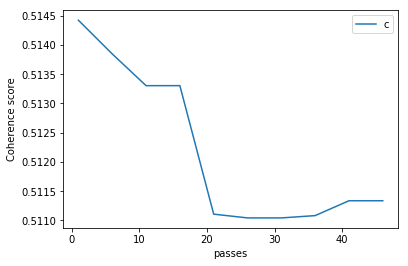

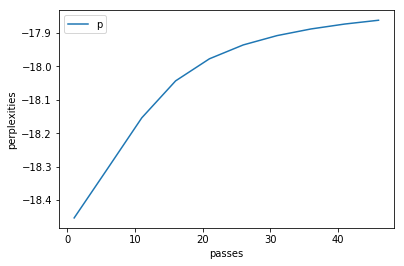

In [130]:
# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("passes")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [131]:
# 최적의 passes는? -> p = 10
p = 10


# 최적의 토픽의 갯수는??


coherencesT=[]
perplexitiesT=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 10*i
    nwords = 100
    #tic = time.time()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('ntopics',ntopics,time.time() - tic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherencesT.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda_model.log_perplexity(corpus))
    


Cpherence 0.46169449276731567
Perplexity:  -8.947435014002668 


Cpherence 0.4264358105679471
Perplexity:  -9.95963264977801 


Cpherence 0.5133047522199219
Perplexity:  -18.153743798993787 


Cpherence 0.5575155038074562
Perplexity:  -22.99809873978731 


Cpherence 0.5737350055547534
Perplexity:  -28.15957520470448 


Cpherence 0.5764596099959526
Perplexity:  -34.60333325270728 


Cpherence 0.5431701281453409
Perplexity:  -44.068327163557115 


Cpherence 0.5047357246671401
Perplexity:  -56.91103795327415 


Cpherence 0.49380232612726244
Perplexity:  -76.56296251966164 


Cpherence 0.5204028876067552
Perplexity:  -93.82995975945333 




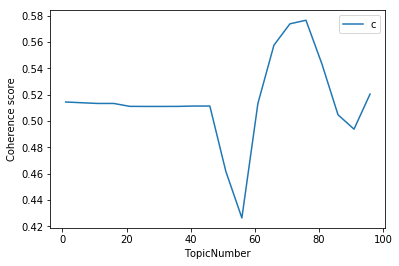

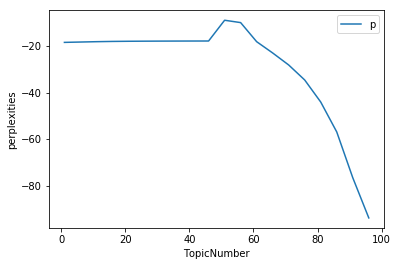

In [148]:
# Show graph
limit=100; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("TopicNumber")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=100; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("TopicNumber")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [152]:
#  최적의 토픽의 수는 50으로 결정!!


# 최적의 모델은?
p = 10
ntopics = 50
    
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)

In [153]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -34.60333325270728

Coherence Score:  0.5764596099959526


In [154]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(35,
  '0.230*"coast" + 0.189*"big" + 0.107*"bash" + 0.096*"follow" + 0.040*"chase" '
  '+ 0.036*"blow" + 0.030*"bat" + 0.016*"guard" + 0.009*"impress" + '
  '0.007*"grapes"'),
 (14,
  '0.154*"png" + 0.140*"gold" + 0.104*"coast" + 0.066*"abc" + 0.060*"defence" '
  '+ 0.045*"likely" + 0.044*"bridge" + 0.042*"suspend" + 0.031*"authorities" + '
  '0.023*"crew"'),
 (4,
  '0.102*"protest" + 0.099*"officer" + 0.095*"hit" + 0.087*"tax" + '
  '0.073*"announce" + 0.061*"confirm" + 0.041*"promise" + 0.036*"sink" + '
  '0.032*"overturn" + 0.022*"cancel"'),
 (40,
  '0.086*"fear" + 0.050*"protect" + 0.047*"behind" + 0.044*"home" + '
  '0.043*"bushfires" + 0.042*"holiday" + 0.041*"politics" + 0.038*"iron" + '
  '0.035*"smith" + 0.033*"know"'),
 (47,
  '0.115*"leave" + 0.096*"open" + 0.078*"tree" + 0.071*"game" + '
  '0.048*"destroy" + 0.045*"bay" + 0.031*"cat" + 0.030*"israel" + '
  '0.024*"fraser" + 0.023*"sit"'),
 (39,
  '0.114*"children" + 0.074*"study" + 0.063*"jet" + 0.063*"help" + '
  '0.058*

In [155]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21    -0.096324  0.016974       1        1  3.072861
31    -0.169075 -0.395995       2        1  2.911307
3     -0.098455  0.016669       3        1  2.809767
38    -0.083369  0.016253       4        1  2.751855
7     -0.092290  0.016531       5        1  2.732339
8     -0.074983  0.015854       6        1  2.726558
2     -0.067825  0.015678       7        1  2.567041
26    -0.064694  0.015570       8        1  2.501166
34    -0.035776  0.014776       9        1  2.446667
13    -0.051511  0.015623      10        1  2.435697
24    -0.045894  0.014983      11        1  2.433367
49    -0.032248  0.014663      12        1  2.431495
15    -0.009587  0.014067      13        1  2.399105
42    -0.039452  0.014875      14        1  2.365450
5     -0.018324  0.014279      15        1  2.249959
48     0.017630  0.013343      16        1  2.220445
20    -0.038649  0.014868      17        1  2.211629
43     0.003204  0.013781      18        1  2.166759
36    -0.020481  0.014382      19        1  2.148957
9     -0.031293  0.014648      20        1  2.142883
0     -0.063368  0.015601      21        1  2.107109
41    -0.006520  0.014056      22        1  2.099575
18    -0.010681  0.014543      23        1  2.069040
25    -0.005890  0.013979      24        1  2.040817
12     0.005735  0.013715      25        1  2.022275
45    -0.008191  0.014108      26        1  1.985146
23    -0.007165  0.014032      27        1  1.960711
32     0.013617  0.013525      28        1  1.912322
30     0.009505  0.013594      29        1  1.823312
46     0.016592  0.013418      30        1  1.797799
44     0.019817  0.013265      31        1  1.792298
11     0.017322  0.013403      32        1  1.777317
17     0.011842  0.013560      33        1  1.765469
27     0.002030  0.013769      34        1  1.724225
37     0.040099  0.012727      35        1  1.689058
28     0.027908  0.013102      36        1  1.638694
29     0.045436  0.012536      37        1  1.636818
19     0.026336  0.013140      38        1  1.621923
6      0.031052  0.012979      39        1  1.618156
10     0.037671  0.012814      40        1  1.561063
1      0.034749  0.012865      41        1  1.553689
16     0.043013  0.012623      42        1  1.542776
33     0.052392  0.012315      43        1  1.524846
40     0.035202  0.012836      44        1  1.495882
22     0.054673  0.012215      45        1  1.488397
39     0.038433  0.012764      46        1  1.483117
47     0.058092  0.012077      47        1  1.467693
14     0.234295 -0.147502      48        1  1.208907
4      0.072823  0.011476      49        1  1.139380
35     0.222576 -0.115360      50        1  0.726879, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
14     Default  3082.000000          say  3082.000000  30.0000  30.0000
246    Default  2622.000000    christmas  2622.000000  29.0000  29.0000
526    Default  2568.000000       charge  2568.000000  28.0000  28.0000
177    Default  2337.000000          nsw  2337.000000  27.0000  27.0000
302    Default  2236.000000       sydney  2236.000000  26.0000  26.0000
560    Default  2141.000000         plan  2141.000000  25.0000  25.0000
350    Default  2349.000000   government  2349.000000  24.0000  24.0000
272    Default  2149.000000          win  2149.000000  23.0000  23.0000
510    Default  1930.000000         warn  1930.000000  22.0000  22.0000
255    Default  2024.000000       change  2024.000000  21.0000  21.0000
902    Default  1847.000000           us  1847.000000  20.0000  20.0000
55     Default  1806.000000         find  1806.000000  19.0000  19.0000
823    Default  1570.000000         west  1570.000000  18.0000  18.0000
2      Default  1681.000000          qld  1681.000000  17.0000  17.0000
1325   Default  1624.000000         call  1624.00